In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
%matplotlib inline
import cv2
import fingerprint_feature_extractor
import fingerprint_enhancer
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential  # Model type to be used

from tensorflow.keras.layers import Dense, Dropout, Activation # Types of layers to be used in our model
from tensorflow.keras.utils import to_categorical 

In [2]:
tf.config.list_physical_devices('GPU')

[]

In [3]:
x_data = np.load( f'x_data.npy' )
y_train = np.load(f'dataset/np_data/label_train.npy')

In [4]:
x_data, y_train = shuffle(x_data,y_train)

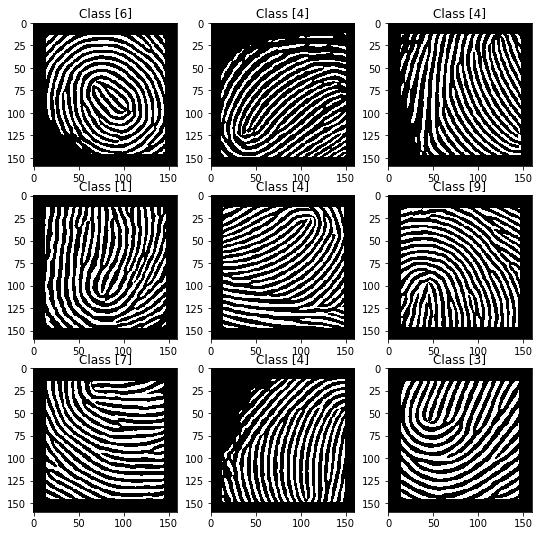

In [5]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(x_data))
    plt.imshow(x_data[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.show()

In [6]:
x_data = x_data.reshape(800, 25600)
x_data = x_data.astype('float32')   # change integers to 32-bit floating point numbers

x_train, x_test, y_train, y_test = train_test_split(x_data, y_train, test_size = 1/5)


x_train /= 255                        # normalize each value for each pixel for the entire vector for each input
x_test /= 255

print("Training matrix shape", x_train.shape)
print("Testing matrix shape", x_test.shape)

Training matrix shape (640, 25600)
Testing matrix shape (160, 25600)


In [7]:
nb_classes = 10 # number of unique digits

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

# Building Model

In [8]:
model = Sequential()

model.add(Dense(16384, input_shape=(25600,)))
model.add(Activation('relu'))

model.add(Dense(16384))
model.add(Activation('relu'))


model.add(Dense(10))
model.add(Activation('softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16384)             419446784 
_________________________________________________________________
activation (Activation)      (None, 16384)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 16384)             268451840 
_________________________________________________________________
activation_1 (Activation)    (None, 16384)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                163850    
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 688,062,474
Trainable params: 688,062,474
Non-trainable params: 0
__________________________________________

# Training Model

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
history=model.fit(x_train, Y_train, batch_size=32, epochs=10)

Epoch 1/10
20/20 [==============================] - 67s 3s/step - loss: 58.4381 - accuracy: 0.1125
Epoch 2/10
20/20 [==============================] - 68s 3s/step - loss: 2.3554 - accuracy: 0.2266
Epoch 3/10
20/20 [==============================] - 67s 3s/step - loss: 1.3534 - accuracy: 0.5453
Epoch 4/10
20/20 [==============================] - 67s 3s/step - loss: 0.5411 - accuracy: 0.8422
Epoch 5/10
20/20 [==============================] - 66s 3s/step - loss: 0.1565 - accuracy: 0.9500
Epoch 6/10
20/20 [==============================] - 67s 3s/step - loss: 0.0630 - accuracy: 0.9781
Epoch 7/10
20/20 [==============================] - 66s 3s/step - loss: 0.0705 - accuracy: 0.9812
Epoch 8/10
20/20 [==============================] - 66s 3s/step - loss: 0.0115 - accuracy: 1.0000
Epoch 9/10
20/20 [==============================] - 66s 3s/step - loss: 0.0175 - accuracy: 0.9953
Epoch 10/10
20/20 [==============================] - 67s 3s/step - loss: 0.0467 - accuracy: 0.9891


In [12]:
score = model.evaluate(x_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

5/5 [==============================] - 1s 270ms/step - loss: 3.9133 - accuracy: 0.2625
Test score: 3.913320541381836
Test accuracy: 0.26249998807907104


In [ ]:
model.save('fingerprint.model')